We intend to use a pretrained convolutional neural net on keras and tensorflow environment with wildlife images from ImageNet.

Potential pretrained neural network base for image classification:
VGG-16
ResNet50
Inceptionv3
EfficientNet

Resne50 is faster, so we are going to use a pretrained resnet50 from Keras

In [1]:
import sys
import sklearn
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial

%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

np.random.seed(42)
tf.random.set_seed(42)

In [5]:
# Upload the images
! pip install kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d iamsouravbanerjee/animal-image-dataset-90-different-animals

 99% 649M/656M [00:10<00:00, 30.3MB/s]
100% 656M/656M [00:10<00:00, 66.4MB/s]


In [7]:
! unzip animal-image-dataset-90-different-animals.zip

Streaming output truncated to the last 5000 lines.
  inflating: animals/animals/bison/73b10839bc.jpg  
  inflating: animals/animals/bison/74dc1dd32a.jpg  
  inflating: animals/animals/bison/75ab166a7d.jpg  
  inflating: animals/animals/bison/79e1610d01.jpg  
  inflating: animals/animals/bison/7ba5eee91f.jpg  
  inflating: animals/animals/bison/7d214aab4b.jpg  
  inflating: animals/animals/bison/7f2ef9ab03.jpg  
  inflating: animals/animals/bison/82ec723a4f.jpg  
  inflating: animals/animals/bison/85e145af6c.jpg  
  inflating: animals/animals/bison/862e2c6379.jpg  
  inflating: animals/animals/bison/87a5c700ad.jpg  
  inflating: animals/animals/bison/88b723ce90.jpg  
  inflating: animals/animals/bison/8c3af742c3.jpg  
  inflating: animals/animals/bison/8e34044b98.jpg  
  inflating: animals/animals/bison/8e6adbdc40.jpg  
  inflating: animals/animals/bison/8fce80d5ba.jpg  
  inflating: animals/animals/bison/961a895686.jpg  
  inflating: animals/animals/bison/984a5b583d.jpg  
  inflating: 

In [8]:
! kaggle datasets download -d antoreepjana/animals-detection-images-dataset

100% 8.92G/8.92G [03:06<00:00, 39.3MB/s]
100% 8.92G/8.92G [03:06<00:00, 51.3MB/s]


In [9]:
! unzip animals-detection-images-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/Squirrel/013240b8dc5ed267.jpg  
  inflating: train/Squirrel/01998042bc8d9fc5.jpg  
  inflating: train/Squirrel/022a6508667c26a4.jpg  
  inflating: train/Squirrel/029dfca01a8a6c27.jpg  
  inflating: train/Squirrel/02a83d8659c234be.jpg  
  inflating: train/Squirrel/02b3690baaf911b8.jpg  
  inflating: train/Squirrel/02b7b759c7f92d7c.jpg  
  inflating: train/Squirrel/02d71b61109cbe80.jpg  
  inflating: train/Squirrel/0308ef4c641df4e5.jpg  
  inflating: train/Squirrel/031dda839ff54675.jpg  
  inflating: train/Squirrel/0346ada1fdb84d6f.jpg  
  inflating: train/Squirrel/0388c753a05557b1.jpg  
  inflating: train/Squirrel/03b2c9285da59756.jpg  
  inflating: train/Squirrel/03f767d0f5a2057d.jpg  
  inflating: train/Squirrel/04044469eb7c479e.jpg  
  inflating: train/Squirrel/041e5d593d2d4b94.jpg  
  inflating: train/Squirrel/04301655bd17cd90.jpg  
  inflating: train/Squirrel/046675ea134c2256.jpg  
  inflating: train/Squirrel/046

In [10]:
# Here we combine the train and test to make one large dataset
! rsync -a test/ train/

In [11]:
# Clean up the disk space
! rm -r test

In [12]:
# Combine the two datasets
! rsync -a animals/animals/bear/ train/Bear/
! rsync -a animals/animals/butterfly/ train/Butterfly/
! rsync -a animals/animals/cat/ train/Cat/
! rsync -a animals/animals/caterpillar/ train/Caterpillar/
! rsync -a animals/animals/cow/ train/Cattle/
! rsync -a animals/animals/crab/ train/Crab/
! rsync -a animals/animals/deer/ train/Deer/
! rsync -a animals/animals/dog/ train/Dog/
! rsync -a animals/animals/eagle/ train/Eagle/
! rsync -a animals/animals/fox/ train/Fox/
! rsync -a animals/animals/goat/ train/Goat/
! rsync -a animals/animals/goldfish/ train/Goldfish/
! rsync -a animals/animals/goose/ train/Goose/
! rsync -a animals/animals/hamster/ train/Hamster/
! rsync -a animals/animals/hedgehog/ train/Hedgehog/
! rsync -a animals/animals/horse/ train/Horse/
! rsync -a animals/animals/jellyfish/ train/Jellyfish/
! rsync -a animals/animals/ladybugs/ train/Ladybug/
! rsync -a animals/animals/lizard/ train/Lizard/
! rsync -a animals/animals/moth/ train/Moths\ and\ butterflies/
! rsync -a animals/animals/mouse/ train/Mouse/
! rsync -a animals/animals/otter/ train/Otter/
! rsync -a animals/animals/owl/ train/Owl/
! rsync -a animals/animals/pig/ train/Pig/
! rsync -a animals/animals/raccoon/ train/Raccoon/
! rsync -a animals/animals/shark/ train/Shark/
! rsync -a animals/animals/sheep/ train/Sheep/
! rsync -a animals/animals/snake/ train/Snake/
! rsync -a animals/animals/sparrow/ train/Sparrow/
! rsync -a animals/animals/squid/ train/Squid/
! rsync -a animals/animals/squirrel/ train/Squirrel/
! rsync -a animals/animals/swan/ train/Swan/
! rsync -a animals/animals/turkey/ train/Turkey/
! rsync -a animals/animals/turtle/ train/Turtle/
! rsync -a animals/animals/woodpecker/ train/Woodpecker/

In [13]:
# Delete class that are not in Virginia for easier modeling
! rm -r animals
! rm -r train/Camel
! rm -r train/Cheetah
! rm -r train/Elephant
! rm -r train/Giraffe
! rm -r train/Hippopotamus
! rm -r train/Jaguar
! rm -r train/Kangaroo
! rm -r train/Koala
! rm -r train/Leopard
! rm -r train/Lion
! rm -r train/Magpie
! rm -r train/Ostrich
! rm -r train/Panda
! rm -r train/Parrot
! rm -r train/Penguin
! rm -r train/Polar\ bear
! rm -r train/Red\ panda
! rm -r train/Rhinoceros
! rm -r train/Scorpion
! rm -r train/Sea\ lion
! rm -r train/Sea\ turtle
! rm -r train/Seahorse
! rm -r train/Tiger
! rm -r train/Whale
! rm -r train/Zebra

In [14]:
# Import the data and pre-process it for the model
from sklearn.datasets import load_files 
from keras.utils import np_utils

from keras.preprocessing import image
from tqdm import tqdm # progress bar

data_dir = "/content/train"
batch_size = 32;
# IMPORTANT: Depends on what pre-trained model you choose, you will need to change these dimensions accordingly
img_height = 256; 
img_width = 256;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = "training",
    seed = 42,
    image_size= (img_height, img_width),
    batch_size = batch_size
)

# Validation Dataset
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.1,
    subset = "validation",
    seed = 42,
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 25766 files belonging to 57 classes.
Using 23190 files for training.
Found 25766 files belonging to 57 classes.
Using 2576 files for validation.


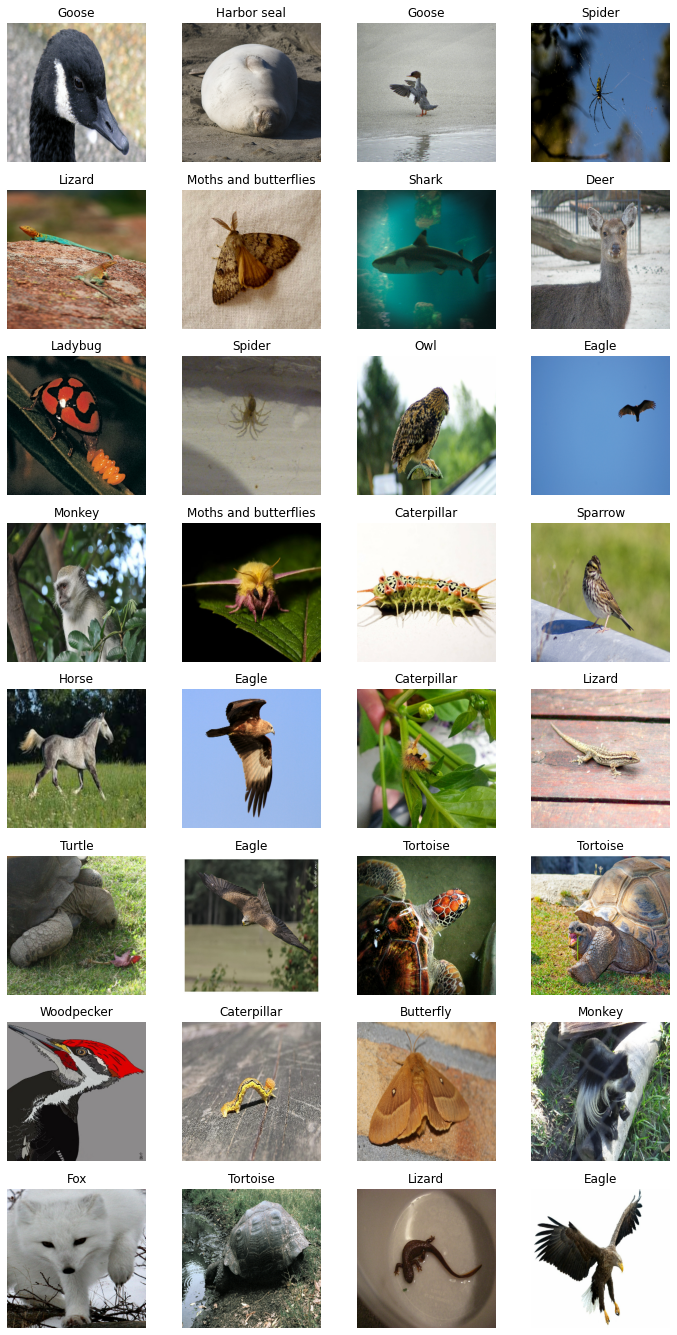

In [17]:
# Visualize some of the train samples of one batch
# Make sure you create the class names that match the order of their appearances in the "files" variable
names = sorted(os.listdir(data_dir))

# Rows and columns are set to fit one training batch (32)
n_rows = 8
n_cols = 4
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)

In [ ]:
def plot_learning_curves(loss, val_loss, measure, axis, epochs):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label=f"Training {measure}")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label=f"Validation {measure}")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, epochs, -0.02, axis])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel(measure)
    plt.grid(True)

In [ ]:
# Our model
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])
base_model = keras.applications.resnet50.ResNet50(input_shape=(256,256,3), include_top=False, weights='imagenet')
inputs = tf.keras.Input(shape=(256,256,3))
x = data_augmentation(inputs)
x = keras.applications.resnet50.preprocess_input(x)
x = base_model(x)
avg = keras.layers.GlobalAveragePooling2D()(x)
output = keras.layers.Dense(57, activation="softmax")(avg)
model = keras.models.Model(inputs=inputs, outputs=output)
print(model.summary())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 sequential_8 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 tf.__operators__.getitem_7   (None, 256, 256, 3)      0         
 (SlicingOpLambda)                                               
                                                                 
 tf.nn.bias_add_7 (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d_7   (None, 2048)             0   

In [ ]:
# Phase 2 of training
for layer in base_model.layers:
    layer.trainable = True
base_learning_rate = 0.00001

model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=base_learning_rate),
              metrics=["accuracy"])$
history = model.fit(train_ds,
                    validation_data=validation_ds,
                    epochs=10)

Epoch 1/10
725/725 [==============================] - 648s 880ms/step - loss: 2.2135 - accuracy: 0.4744 - val_loss: 1.0187 - val_accuracy: 0.7275
Epoch 2/10
725/725 [==============================] - 636s 875ms/step - loss: 0.9511 - accuracy: 0.7443 - val_loss: 0.6942 - val_accuracy: 0.7931
Epoch 3/10
725/725 [==============================] - 632s 870ms/step - loss: 0.6731 - accuracy: 0.8064 - val_loss: 0.5905 - val_accuracy: 0.8195
Epoch 4/10
725/725 [==============================] - 632s 869ms/step - loss: 0.5473 - accuracy: 0.8342 - val_loss: 0.5418 - val_accuracy: 0.8257
Epoch 5/10
725/725 [==============================] - 636s 874ms/step - loss: 0.4670 - accuracy: 0.8562 - val_loss: 0.5118 - val_accuracy: 0.8311
Epoch 6/10
725/725 [==============================] - 633s 871ms/step - loss: 0.4084 - accuracy: 0.8700 - val_loss: 0.5036 - val_accuracy: 0.8327
Epoch 7/10
725/725 [==============================] - 630s 867ms/step - loss: 0.3571 - accuracy: 0.8861 - val_loss: 0.4877 -

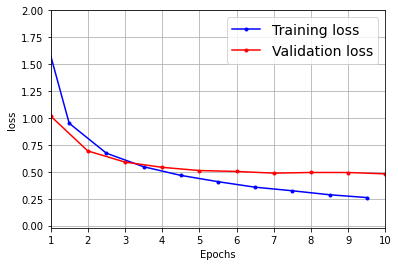

In [ ]:
plot_learning_curves(history.history["loss"], history.history["val_loss"], 'loss', 2, 10)

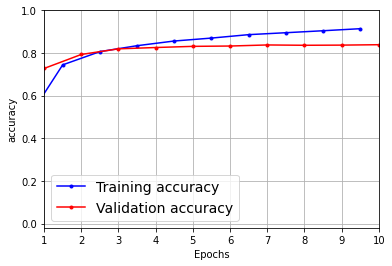

In [ ]:
plot_learning_curves(history.history["accuracy"], history.history["val_accuracy"], 'accuracy', 1, 10)

In [15]:
# Can also skip the training since it takes so long and upload the model that was previously saved
model = keras.models.load_model('/content/1.h5')

In [ ]:
def predict(img_path, model):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)
    prediction = model.predict(img_preprocessed)
    cname = np.argmax(prediction)
    animal = names[cname]    
    return animal

# Test the model on a deer, eagle, bear, and tortoise
deer_path = '/content/deer.jpg'
eagle_path = '/content/eagle.jpg'
bear_path = '/content/bear.jpg'
tortoise = '/content/tortoise.png'

print(predict(deer_path, model))
print(predict(eagle_path, model))
print(predict(bear_path, model))
print(predict(tortoise, model))


Deer
Eagle
Bear
Tortoise


In [18]:
# Confusion matrix
predicted_categories = []
true_categories = []

for x, y in validation_ds:
    pred = model.predict(x).argmax(axis=1)
    predicted_categories.extend(pred)
    true_categories.extend(y)

matrix = tf.math.confusion_matrix(predicted_categories, true_categories).numpy()

for name in names:
  print(name, end='\t')
for x in matrix:
  print()
  for y in x:
    print(y, end='\t')

Bear	Brown bear	Bull	Butterfly	Canary	Cat	Caterpillar	Cattle	Centipede	Chicken	Crab	Crocodile	Deer	Dog	Duck	Eagle	Fish	Fox	Frog	Goat	Goldfish	Goose	Hamster	Harbor seal	Hedgehog	Horse	Jellyfish	Ladybug	Lizard	Lynx	Monkey	Moths and butterflies	Mouse	Mule	Otter	Owl	Pig	Rabbit	Raccoon	Raven	Shark	Sheep	Shrimp	Snail	Snake	Sparrow	Spider	Squid	Squirrel	Starfish	Swan	Tick	Tortoise	Turkey	Turtle	Woodpecker	Worm	
6	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
5	12	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	3	0	0	0	0	8	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	194	0	0	2	0	0	0	0	0	0	0	0	0	1	0	1	0	0	0	0	0	0	1	1	0	2	0	0	34	0	0	0	0	0	0	0	1	0	0	0	0	0	2	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	7	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	7	0

In [26]:
# Precision, Recall, and F1-score
true_pos_matrix = np.diag(matrix)
true_pos = np.sum(true_pos_matrix)
false_pos = np.sum(np.sum(matrix, axis=0) - true_pos_matrix)
false_neg = np.sum(np.sum(matrix, axis=1) - true_pos_matrix)
print(true_pos, false_pos, false_neg)

precision = np.sum(true_pos / (true_pos + false_pos))
recall = np.sum(true_pos / (true_pos + false_neg))
f1 = 2 *(precision*recall)/(precision+recall)

print(f"Precision: {precision}\nRecall: {recall}\nF1-Score: {f1}")

2161 415 415
Precision: 0.8388975155279503
Recall: 0.8388975155279503
F1-Score: 0.8388975155279503


In [ ]:
# Save model for future use
model.save("/content/models/1.h5", save_format='h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
